In [1]:

"""
juliamap(c,z; maxiter) :
  Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero
if the iteration never diverges.

 - c : complex constant definining the set
 - z : complex number being iterated
 - maxiter : maximum iteration number, defaults to 100
"""
function juliamap(c, z; maxiter=100)
    for n = 1:maxiter
        z = z^2 + c
        if abs(z) > 2
            return n
        end
    end
    return 0
end

@doc juliamap

juliamap(c,z; maxiter) :   Implement the iteration algorithm for a Julia Set.

**Returns:** integer number of iterations, or zero if the iteration never diverges.

  * c : complex constant definining the set
  * z : complex number being iterated
  * maxiter : maximum iteration number, defaults to 100


In [2]:
# Specialize juliamap to c=0
j0(z) = juliamap(0,z)

# Evaluate j0 on single complex points. Note: im is the imaginary unit in Julia
print( j0( complex(1.1, 0.3) ) )  # Recommended construction for complex numbers
print( j0( 1.1 + 0.3im ) )       # Equivalent result, but constructs z in 2 steps

# Evaluate j0 across an array - the . notation automatically vectorizes any function
a = linspace(complex(0.1,0.3), complex(1.5,0.3), 100)
print( j0.(a) )

33

[0

, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Discuss
Note in particular the line showing that the convention f.(a) for a function f vectorizes the function f across an entire array of arguments

This code is  defining  a function just like our  python function that outputs a function juliamap. Then it applies it  to both one number, and an array of numbers using . notation instead of np.vectorize

In [3]:
# Create a complex plane
function complex_plane(xmin=-2, xmax=2, ymin=-2, ymax=2; xpoints=2000, ypoints=2000)
    # y is a column vector
    y = linspace(ymin, ymax, ypoints)

    # x uses a transpose, yielding a row vector
    x = linspace(xmin, xmax, xpoints)'

    # z uses broadcasted addition and multiplication to create a plane
    z = x .+ y.*im;

    # The final line of a block is treated as the return value, in the absence
    # of an explicit return statement
end

complex_plane (generic function with 5 methods)

In [4]:
# The vectorized function can be applied directly to the plane
@time cplane = complex_plane()
@time j0p = j0.(cplane)

  0.318543 seconds (156.15 k allocations: 68.805 MiB, 9.35% gc time)


  0.825832 seconds (76.03 k allocations: 34.587 MiB, 11.08% gc time)


2000×2000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1

# Discuss
Discuss exactly how this code works.  What's the difference between the comma and the semicolon in the list of arguments?

The comma is used for separateing arguments, and the semi-colon separates named and unnamed arguments.

This code creates a function complex_plane and creates a complex plane using vectors.

then the j0 function is applied to the whole plane using . notation

In [5]:
mutable struct ComplexPlane
    x :: LinSpace{Float64}
    y :: LinSpace{Float64}
    z :: Array{Number,2}
    
    function ComplexPlane(xmin=-2, xmax=2, ymin=-2, ymax=2;
                            xpoints=200, ypoints=200)
        x = linspace(xmin, xmax, xpoints)
        y = linspace(ymin, ymax, ypoints)
        z = x' .+ y.*im
        new(x,y,z)
    end
end

In [6]:
cplane = ComplexPlane(xpoints=200,ypoints=200);
typeof(cplane)

ComplexPlane

In [7]:
print(typeof(cplane.x))
cplane.z = j0.(cplane.z)

LinSpace{Float64}

200×200 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  

# Discuss
How does a mutable struct compare to a Python class?
How is the constructor like the __init__ method of a Python class?

The Julia constructor creates the plane object, similar to the way our __init__ function in our Python class created the new complex plane.

The mutable struct seems to behave exactly like a class, however it doesn't have the explicit "self" element for "class" methods.

INFO: Building Conda


INFO: Building PyCall


INFO: PyCall is using /usr/bin/python (Python 2.7.12) at /usr/bin/python, libpython = libpython2.7
INFO: /home/user/.julia/v0.6/PyCall/deps/deps.jl has been updated


INFO: /home/user/.julia/v0.6/PyCall/deps/PYTHON has not changed


INFO: Recompiling stale cache file /home/user/.julia/lib/v0.6/PyCall.ji for module PyCall.


INFO: Recompiling stale cache file /home/user/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


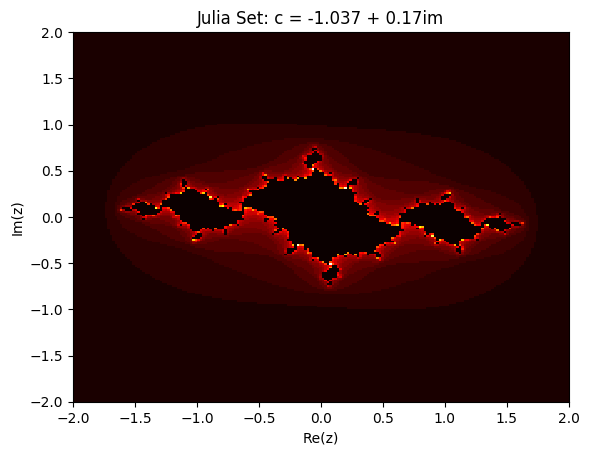

In [8]:
# Plotting with PyPlot
# Run the following in a terminal julia interpreter, not the notebook!
# Pkg.add("PyPlot")    #  This downloads the package via git and installs it
# Pkg.build("PyPlot)   #  Check that everything is built properly
Pkg.build("PyCall")
# This should only need to be done once to verify it is installed properly
    
c = -1.037 + 0.17im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file

Change the seed value (c) in the code for generating Julia Sets to see what happens.  Find values of c that you like.
Plot 5 of your favorite Julia Sets in your notebook.
Commit the notebook in GitHub.

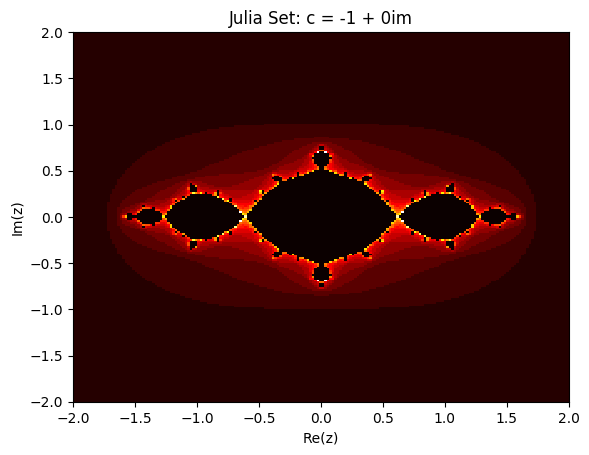

In [9]:
c = -1 + 0im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file

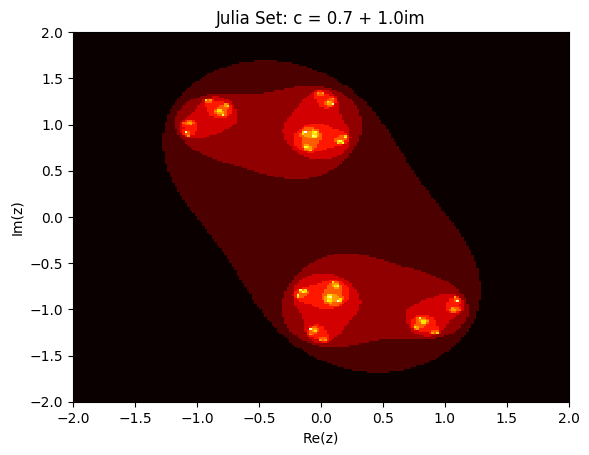

In [14]:
c = 0.7 + 1im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file

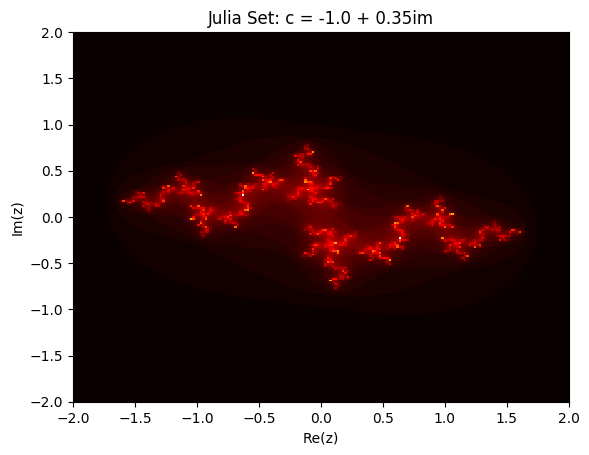

In [11]:
c = -1 + 0.35im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file

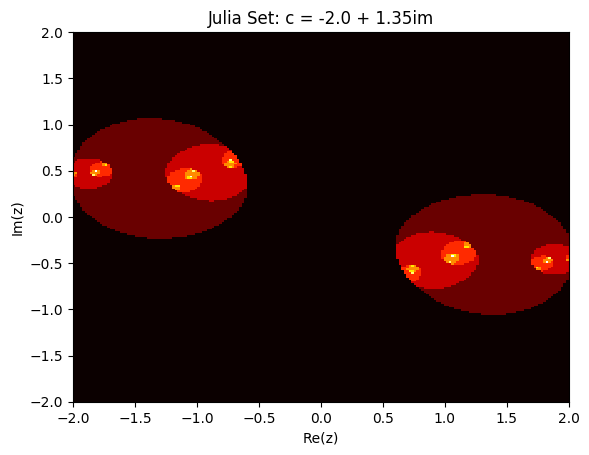

In [12]:
c = -2 + 1.35im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file

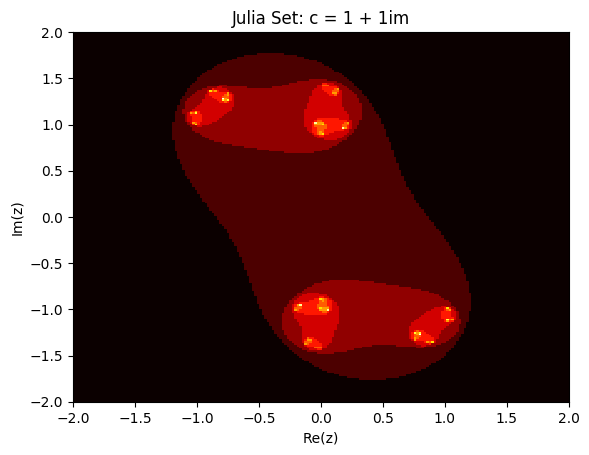

In [13]:
c = 1 + 1im                  #  Set starting point of julia set
j(z) = juliamap(c, z)                #  Create julia map
cplane = ComplexPlane()              #  Create 2000x2000 point complex plane
jp = j.(cplane.z);                   #  Apply julia map to entire plane


using PyPlot                         #  Load PyPlot package into the current namespace
figure(1)
xlabel("Re(z)")
ylabel("Im(z)")
title("Julia Set: c = " * string(c))
pcolormesh(cplane.x, cplane.y, jp, cmap=PyPlot.cm_get_cmap("hot"))
savefig("julia.png")                 #  Also output figure to png file